# Support Vector Regression (SVR)

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Data Set

In [5]:
dataset = pd.read_csv('Accenture Salary Dataset.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [6]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [12]
 [13]]


In [7]:
print(y)

[  17000   27000   40000   65000  100000  150000  250000  400000  650000
 1000000 1800000 4000000]


## Feature Scaling

In [8]:
y=y.reshape(len(y),1)

In [9]:
print(y)

[[  17000]
 [  27000]
 [  40000]
 [  65000]
 [ 100000]
 [ 150000]
 [ 250000]
 [ 400000]
 [ 650000]
 [1000000]
 [1800000]
 [4000000]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [11]:
print(X)

[[-1.52973232]
 [-1.25977956]
 [-0.9898268 ]
 [-0.71987403]
 [-0.44992127]
 [-0.17996851]
 [ 0.08998425]
 [ 0.35993702]
 [ 0.62988978]
 [ 0.89984254]
 [ 1.43974807]
 [ 1.70970083]]


In [12]:
print(y)

[[-0.62024154]
 [-0.61126879]
 [-0.59960421]
 [-0.57717233]
 [-0.54576769]
 [-0.50090393]
 [-0.4111764 ]
 [-0.27658511]
 [-0.05226629]
 [ 0.26178007]
 [ 0.9796003 ]
 [ 2.95360593]]


In [13]:
#Support Vector Regression
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [14]:
regressor.predict(sc_X.transform([[6.5]]))
# here the prediction is wrong as we get feature scaled output

array([-0.36788056])

In [16]:
#this is the correct way
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[298252.57347613]])

## Visualising the SVR results

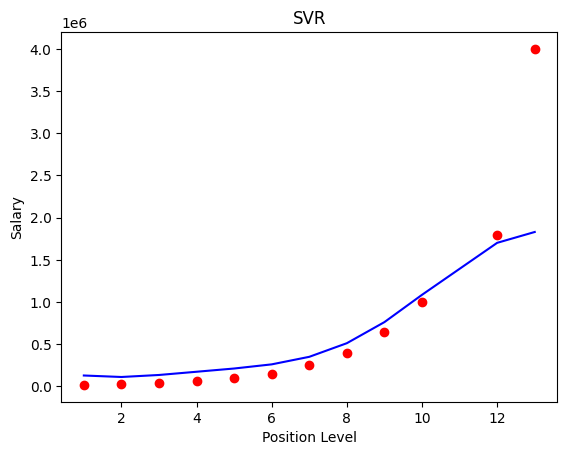

In [18]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()